In [1]:
import numpy as np
import pandas as pd
import seaborn
import statsmodels
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import coint
import logging

ImportError: No module named seaborn

In [37]:
logging.basicConfig(level=logging.DEBUG,
                   format='%(asctime)s %(filename)s[line:%(lineno)d] %(levelname)s %(message)s',
                   datefmt='%a, %d %b %Y %H:%M:%S',
                   filename='myapp.log',
                   filemode='w')
logging.debug('This is debug message')
logging.info('This is info message')
logging.warning('This is warning message')

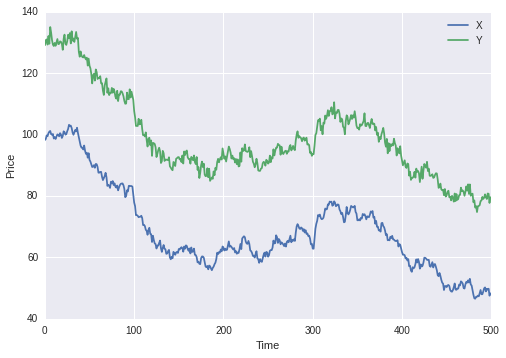

In [38]:
np.random.seed(100)
mu,sigma = 0, 1 # mean and standard deviation
x = np.random.normal(mu, sigma, 500)
y = np.random.normal(mu, sigma, 500)
X = pd.Series(cumsum(x)) + 100
Y = X + y + 30
# add trend item for X and Y
for i in range(500):
    X[i] = X[i] - i/10
    Y[i] = Y[i] - i/10
plot(X); plot(Y);
plt.xlabel("Time"); plt.ylabel("Price");
plt.legend(["X", "Y"]);


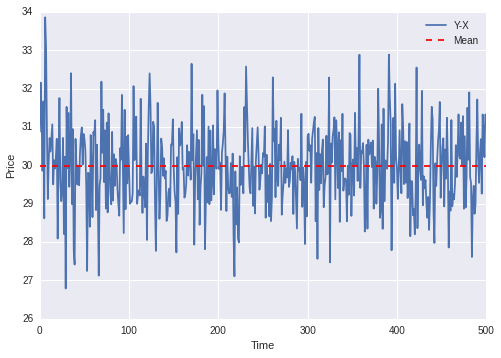

In [3]:
plot(Y-X);
plt.axhline((Y-X).mean(), color="red", linestyle="--");
plt.xlabel("Time"); plt.ylabel("Price");
plt.legend(["Y-X", "Mean"]);


In [28]:
# calculate z-score
# account for transaction fee
def zscore(series):
    return (series - series.mean()) / np.std(series)

print mean(Y-X)
print (Y-X).mean()

def bit_score(series1, series2, fee1=0.003, fee2=0.003, min_profit=0.1):
    series = series1 - series2
    mu = series.mean()
    sigma = np.std(series)
    z_score = (series[-1] - mu) / sigma
    margin1 = mu - series1[-1]*(1+fee1) - min_profit
    margin2 = mu - series2[-1]*(1+fee2) - min_profit
    #log
    if z_score > 1 and margin2 > 0:
        #log
        return "buy2"
    if z_score < -1 and margin1 > 0:
        #log
        return "buy1"
        
bit_score(X,Y)
    
#print (Y-X)[-1]

29.9718738591
29.9718738591


KeyError: -1

In [34]:
s=pd.Series([1,2,3])
s.pop(-1)

KeyError: -1

In [41]:
class my_account(object):
    """This is my_account"""
    def __init__(self, RMB, BitCoin, Fee):
        self.RMB = RMB
        self.BitCoin = BitCoin
        self.Fee = Fee
        self.state = "even"
        self.BuyPrice = 8000
    def order_taget(RMB, BitCoin):
        self.RMB += RMB
        self.BitCoin += BitCoin

In [40]:
## -------------------------------------
## output states: 
##     buy1,buy2,side1,side2
##     sell1,sell2
##     price1, price2
##     abort
## -------------------------------------
def get_signal():
    z_score = z_test()
    if z_score > 1:
        return('buy1')
    if z_score < -1:
        return('buy2')
    if -1 <= z_score <= 1:
        if z_score >= 0:
            return('side1')
        else:
            return('side2')
        
def change_positions(new_state):
    if new_state == 'buy1':
        pass
        # send command to buy 1
        # detect feedback
        # if everything is OK, update my_account
        # else, raise EXCEPTION
    if new_state == 'buy2':
        pass
        # send command to buy 2
        # detect feedback
        # if everything is OK, update my_account
        # else, raise EXCEPTION